In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# 导入数据
df = pd.read_csv(open("./Top250.csv", encoding='utf8'), sep=',',dtype=str)
print(df.size, df.shape)

3000 (250, 12)


## 电影类型

<BarContainer object of 27 artists>

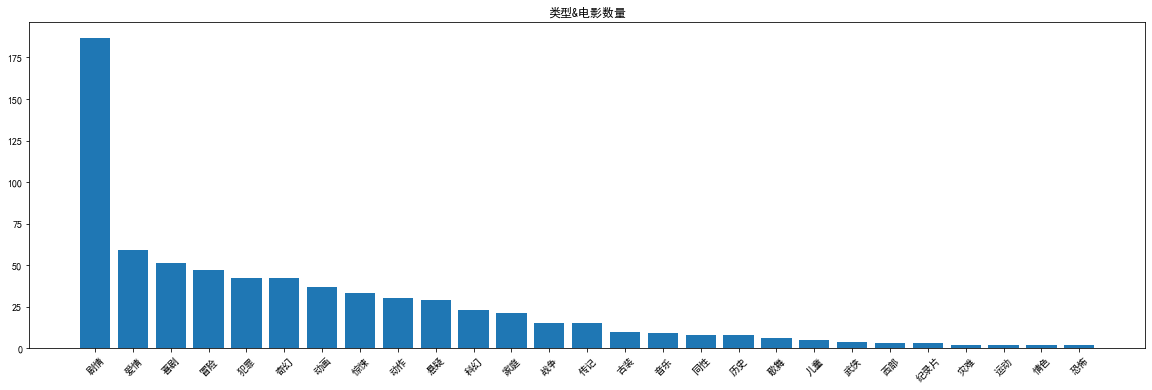

In [48]:
count_dict = dict()
classs = []
[classs.extend(i.split()) for i in list(df['剧情类型'])]
for item in classs:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1
res = sorted(count_dict.items(),key = lambda x:x[1],reverse = True)
x=[]
y=[]
for item in res:
    x.append(item[0])
    y.append(item[1])
    
plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("类型&电影数量")
plt.xticks(rotation=45)
plt.bar(x, y)

## 电影国家或地区

<BarContainer object of 37 artists>

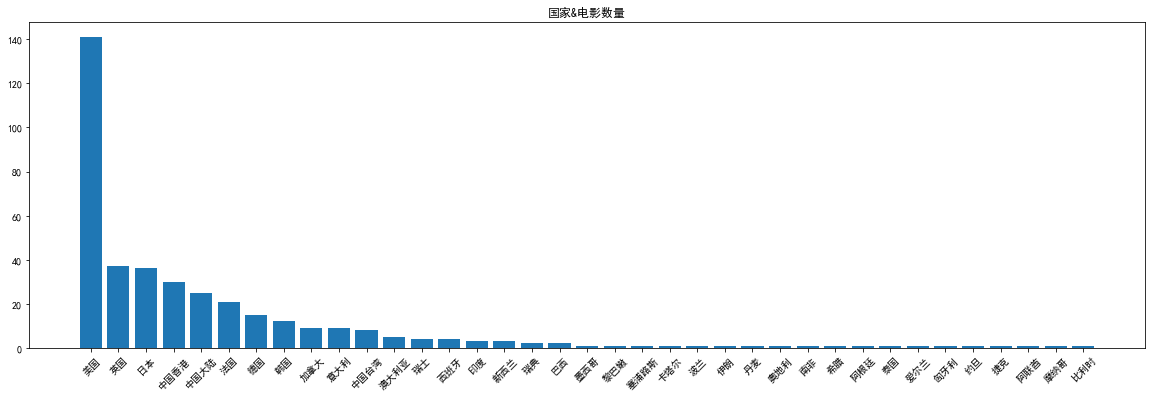

In [51]:
count_dict = dict()
classs = []
[classs.extend(i.split()) for i in list(df['地区'])]
for item in classs:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1
res = sorted(count_dict.items(),key = lambda x:x[1],reverse = True)
x=[]
y=[]
for item in res:
    x.append(item[0])
    y.append(item[1])

plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("国家或地区&电影数量")
plt.xticks(rotation=45)
plt.bar(x,y)

## 电影导演

<BarContainer object of 25 artists>

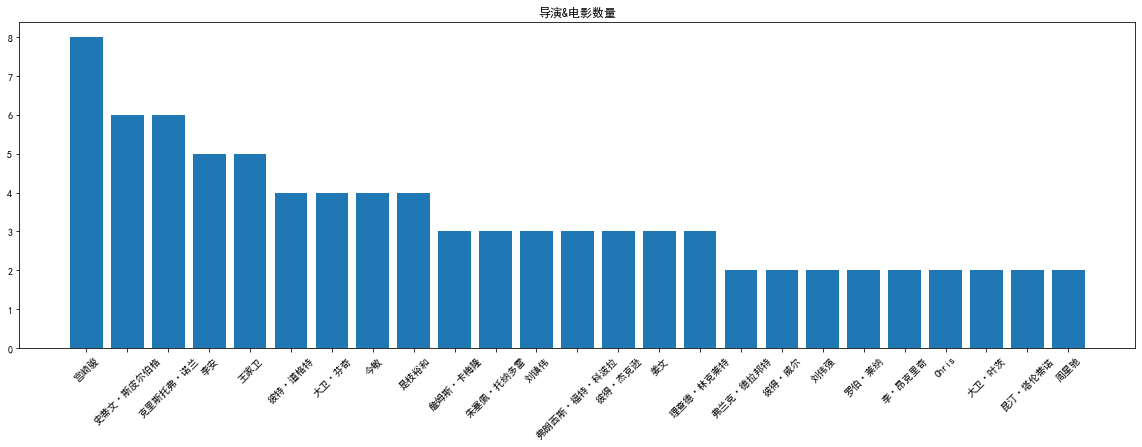

In [56]:
count_dict = dict()
classs = []
[classs.extend(i.split()) for i in list(df['导演'])]
for item in classs:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1
res = sorted(count_dict.items(),key = lambda x:x[1],reverse = True)
x=[]
y=[]
for item in res:
    x.append(item[0])
    y.append(item[1])

plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("导演&电影数量")
plt.xticks(rotation=45)
plt.bar(x[:25],y[:25])

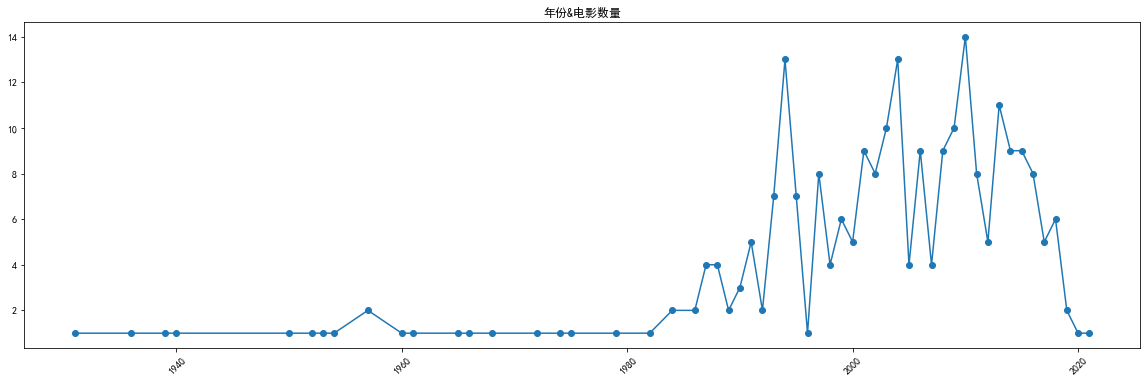

In [10]:
year = list(map(int,list(df['年份'])))
count_dict = dict()
for item in year:
    if item in count_dict:
        count_dict[item] += 1
    else:
        count_dict[item] = 1
res = sorted(count_dict.items(),key = lambda x:x[0],reverse = False)
x=[]
y=[]
for item in res:
    x.append(item[0])
    y.append(item[1])

plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title("年份&电影数量")
plt.xticks(rotation=45)
plt.plot(x,y, marker='o')

## 电影排名与评论人数相关度分析

(array([49., 91., 53., 24., 13.,  8.,  4.,  7.,  0.,  1.]),
 array([ 119505. ,  383840.9,  648176.8,  912512.7, 1176848.6, 1441184.5,
        1705520.4, 1969856.3, 2234192.2, 2498528.1, 2762864. ]),
 <BarContainer object of 10 artists>)

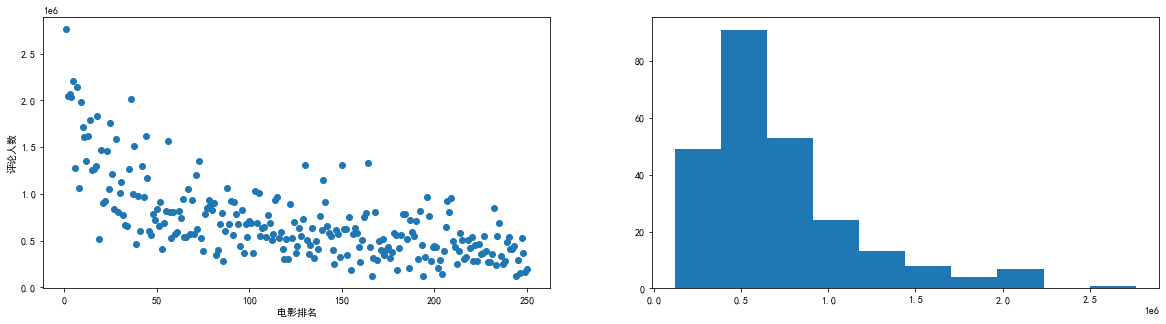

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
rank = [i+1 for i in range(250)]
com = list(map(int,list(df['评论人数'])))
# 绘制散点图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(rank,com)
plt.xlabel('电影排名')
plt.ylabel('评论人数')

# 绘制直方图
plt.subplot(1,2,2)
plt.hist(com)

## 短评语义情感分析

1、《肖申克的救赎》
情感指数：0.9970054884367598	评分：4
情感指数：0.999999999999704	评分：5
情感指数：0.9458360196926874	评分：5
情感指数：0.9996916851304701	评分：5
情感指数：1.0	评分：5
情感指数：0.9793214918080596	评分：5
情感指数：0.7557794605815822	评分：5
情感指数：0.48759563531351846	评分：5
情感指数：0.939862299971305	评分：5
情感指数：0.27984147275311977	评分：5
情感指数：0.7687881471326308	评分：5
情感指数：0.9940798191710857	评分：5
情感指数：0.2211276549687775	评分：4
情感指数：0.9447003138480444	评分：5
情感指数：0.9999047778199698	评分：5
情感指数：0.9999999821060838	评分：5
情感指数：0.9999999957849577	评分：4
情感指数：0.9999999999997127	评分：5
情感指数：0.9780828833141295	评分：5
情感指数：0.7631582444770034	评分：5
情感指数：0.06546767030711775	评分：5
情感指数：0.24265522048908794	评分：4
情感指数：0.25358414211862834	评分：5
情感指数：0.6888431532552871	评分：5
情感指数：0.9999999813326718	评分：5
情感指数：0.9999889778866169	评分：4
情感指数：0.7649725882265741	评分：3
情感指数：0.9999999758638641	评分：5
情感指数：0.3208995304123283	评分：5
情感指数：0.9992197693610907	评分：5
情感指数：0.9618455377822317	评分：5
情感指数：0.09830286588670378	评分：3
情感指数：0.9999091556593541	评分：5
情感指数：0.9999999371694002	评分：5
情感指数：0.9999999

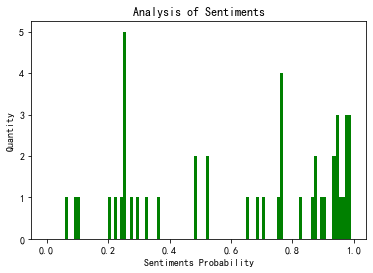

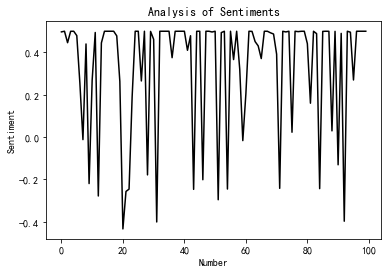

In [16]:
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import numpy as np

sentimentslist = []
n=0
short = eval(df['短评'][n])
print('{}、《{}》'.format(n+1,df['电影中文名'][n]))
for i in short:
    s = SnowNLP(i[0])
    print('情感指数：{}\t评分：{}'.format(s.sentiments,i[1]))
    sentimentslist.append(s.sentiments)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.hist(sentimentslist, bins = np.arange(0, 1, 0.01), facecolor = 'g')
plt.xlabel('Sentiments Probability')
plt.ylabel('Quantity')
plt.title('Analysis of Sentiments')
plt.show()

#情感波动分析
result = []
i = 0
while i<len(sentimentslist):
    result.append(sentimentslist[i]-0.5)
    i = i + 1

#可视化画图
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 100, 1), result, 'k-')
plt.xlabel('Number')
plt.ylabel('Sentiment')
plt.title('Analysis of Sentiments')
plt.show()

201、《大佛普拉斯》
情感指数：0.5277952438937551	评分：4
情感指数：0.012549572629221628	评分：4
情感指数：0.9991120930693042	评分：4
情感指数：0.9999999968242346	评分：4
情感指数：0.2827443385784384	评分：5
情感指数：0.9999999368633112	评分：4
情感指数：0.7016948718597255	评分：5
情感指数：1.6435411701931635e-05	评分：5
情感指数：0.9999999864060585	评分：5
情感指数：0.9999999987369028	评分：5
情感指数：0.9999999641331216	评分：5
情感指数：0.9999999928181347	评分：5
情感指数：0.9999312012756509	评分：5
情感指数：0.99999886792535	评分：5
情感指数：0.9999983512137767	评分：5
情感指数：0.9999513942772739	评分：5
情感指数：0.9225041379890753	评分：4
情感指数：0.9984566080143126	评分：5
情感指数：0.9473054474546588	评分：3
情感指数：0.9995161146806893	评分：5
情感指数：0.9999999838560092	评分：3
情感指数：0.7937443324865647	评分：2
情感指数：0.9988354056053842	评分：4
情感指数：0.9999989815074549	评分：3
情感指数：0.7704839784546054	评分：3
情感指数：0.9999999999999984	评分：3
情感指数：0.9995630270724946	评分：5
情感指数：0.9969401827366802	评分：4
情感指数：0.9998965913303135	评分：4
情感指数：0.9999996792435145	评分：4
情感指数：0.9997756636380241	评分：3
情感指数：0.9999969431439856	评分：None
情感指数：0.40642727675380064	评分：4
情感指数：0.9889629047221781

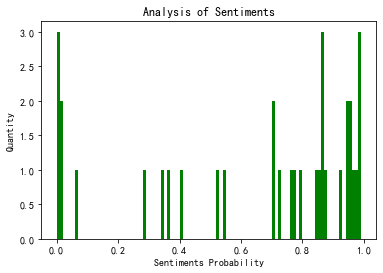

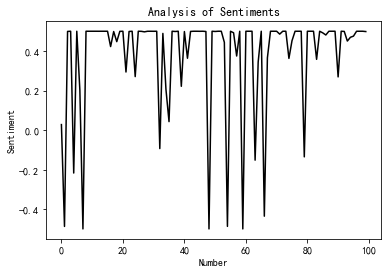

In [18]:
from snownlp import SnowNLP
import matplotlib.pyplot as plt
import numpy as np

sentimentslist = []
n=200
short = eval(df['短评'][n])
print('{}、《{}》'.format(n+1,df['电影中文名'][n]))
for i in short:
    s = SnowNLP(i[0])
    print('情感指数：{}\t评分：{}'.format(s.sentiments,i[1]))
    sentimentslist.append(s.sentiments)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.hist(sentimentslist, bins = np.arange(0, 1, 0.01), facecolor = 'g')
plt.xlabel('Sentiments Probability')
plt.ylabel('Quantity')
plt.title('Analysis of Sentiments')
plt.show()

#情感波动分析
result = []
i = 0
while i<len(sentimentslist):
    result.append(sentimentslist[i]-0.5)
    i = i + 1

#可视化画图
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 100, 1), result, 'k-')
plt.xlabel('Number')
plt.ylabel('Sentiment')
plt.title('Analysis of Sentiments')
plt.show()